In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from number_recognition_network import *

In [2]:
df_pd = pd.read_csv('train.csv')
df = np.array(df_pd)
m, n = df.shape

print("Images:", m, "\nPixels:", n-1)

Images: 42000 
Pixels: 784


In [3]:
# Each column is an entry, rows are features.

test_set = df[0:1000].T
X_test, y_test = test_set[1:n]/255, test_set[0]

print(X_test.shape, y_test.shape)

(784, 1000) (1000,)


In [4]:
# Each column is an entry, rows are features.

training_set = df[1000:m].T
X_train, y_train = training_set[1:n]/255, training_set[0]

print(X_train.shape, y_train.shape)

(784, 41000) (41000,)


Eample No:    10866/41000
Known Label:  3


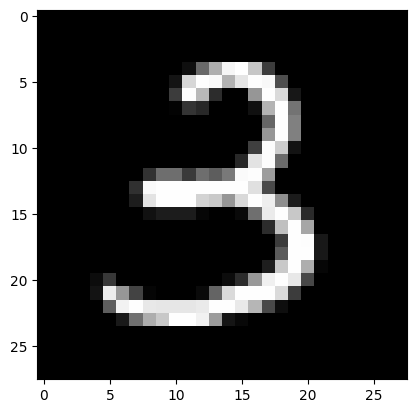

In [5]:
index = np.random.randint(0, X_train.shape[1])
image = X_train[:, index, None]
label = y_train[index]

print("Eample No:   ", f"{index}/{y_train.size}")
print("Known Label: ", label)

plt.imshow(image.reshape((28, 28)), interpolation='nearest')
plt.gray()
plt.show()

In [6]:
weight_layer_1, bias_layer_1, weight_layer_2, bias_layer_2, training_log = gradient_descent(X_train, y_train, n_hidden=20, lr=0.1, n_iters=501)

Iteration    0 | Loss: 2.4719 | Train Score: 0.1037

Iteration   10 | Loss: 1.9535 | Train Score: 0.4055

Iteration   20 | Loss: 1.5839 | Train Score: 0.5675

Iteration   30 | Loss: 1.2452 | Train Score: 0.7028

Iteration   40 | Loss: 1.0002 | Train Score: 0.7505

Iteration   50 | Loss: 0.8476 | Train Score: 0.7826

Iteration   60 | Loss: 0.7452 | Train Score: 0.8074

Iteration   70 | Loss: 0.6720 | Train Score: 0.8261

Iteration   80 | Loss: 0.6171 | Train Score: 0.8387

Iteration   90 | Loss: 0.5744 | Train Score: 0.8504

Iteration  100 | Loss: 0.5402 | Train Score: 0.8589

Iteration  110 | Loss: 0.5122 | Train Score: 0.8649

Iteration  120 | Loss: 0.4889 | Train Score: 0.8701

Iteration  130 | Loss: 0.4693 | Train Score: 0.8746

Iteration  140 | Loss: 0.4526 | Train Score: 0.8784

Iteration  150 | Loss: 0.4383 | Train Score: 0.8816

Iteration  160 | Loss: 0.4259 | Train Score: 0.8845

Iteration  170 | Loss: 0.4150 | Train Score: 0.8870

Iteration  180 | Loss: 0.4054 | Train Score: 0

In [7]:
pd.DataFrame(training_log).head()

,train_loss,train_acc
0,2.471903,0.103659
1,1.953497,0.405537
2,1.583881,0.567512
3,1.245207,0.702805
4,1.000193,0.750463


In [8]:
pd.DataFrame(training_log).tail()

,train_loss,train_acc
46,0.303879,0.913439
47,0.302247,0.913854
48,0.300663,0.914293
49,0.299121,0.914927
50,0.297620,0.915049


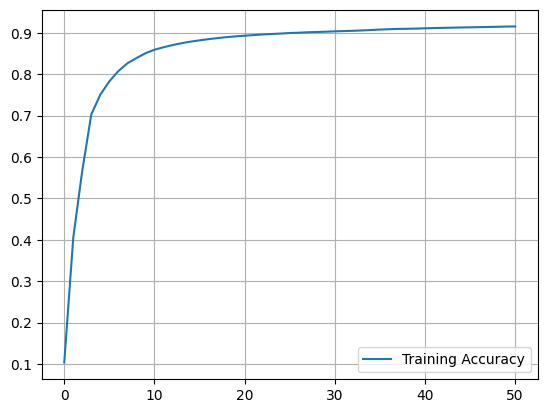

In [9]:
t=(range(0,len(training_log['train_acc'])))
plt.plot(t, training_log['train_acc'], label='Training Accuracy')
plt.legend()
plt.grid()
plt.show()

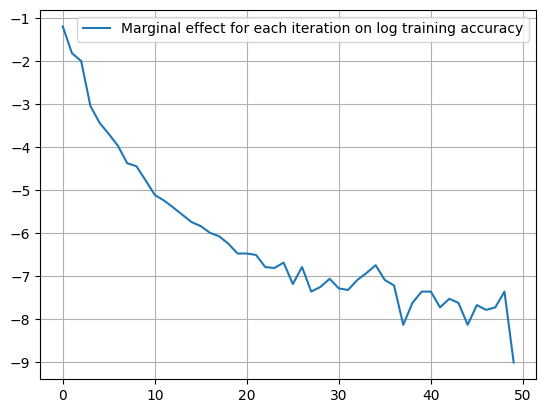

In [10]:
dydx_t = range(len(training_log['train_acc']) - 1)
dydx_acc = [training_log['train_acc'][i+1] - training_log['train_acc'][i] 
            for i in dydx_t]

plt.plot(dydx_t, np.log(dydx_acc), label='Marginal effect for each iteration on log training accuracy')
plt.legend()
plt.grid()
plt.show()

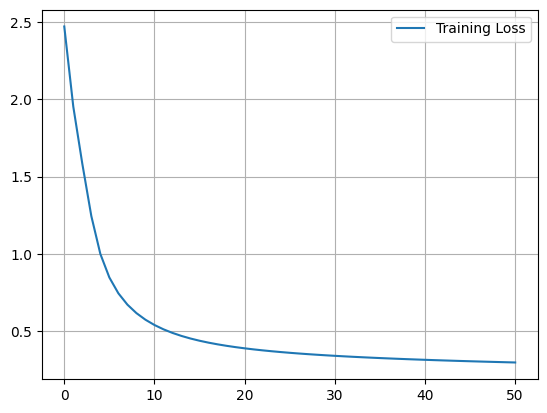

In [11]:
plt.plot(t, training_log['train_loss'], label="Training Loss")
plt.legend()
plt.grid()
plt.show()

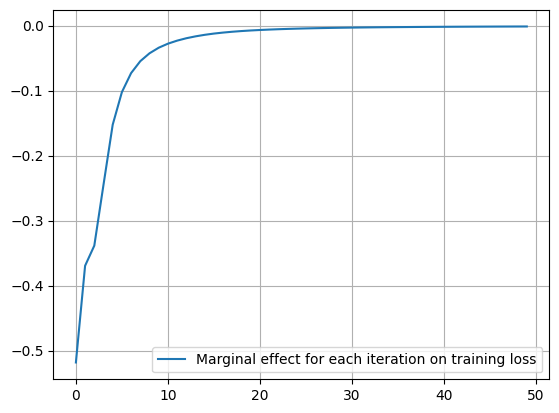

In [12]:
dydx_t = range(len(training_log['train_loss']) - 1)
dydx_loss = [training_log['train_loss'][i+1] - training_log['train_loss'][i] 
            for i in dydx_t]

plt.plot(dydx_t, dydx_loss, label='Marginal effect for each iteration on training loss')
plt.legend()
plt.grid()
plt.show()

In [13]:
'''Training Score'''

_, _, _, A2 = forward_prop(weight_layer_1, bias_layer_1, weight_layer_2, bias_layer_2, X_train)
y_prediction = predict(A2)
score(y_prediction, y_train)

np.float64(0.9150731707317074)

In [14]:
'''Test score'''

_, _, _, A2 = forward_prop(weight_layer_1, bias_layer_1, weight_layer_2, bias_layer_2, X_test)
y_prediction = predict(A2)
score(y_prediction, y_test)

np.float64(0.911)

Eample No:         15550/41000
Known Label:       1
Model Prediction:  1
Prediction:        True
Confidence:        High: 93.05%

Network Reasoning
1    93.05
8     4.43
2     1.35
3     1.04
5     0.08
9     0.02
7     0.02
6     0.01
0     0.00
4     0.00


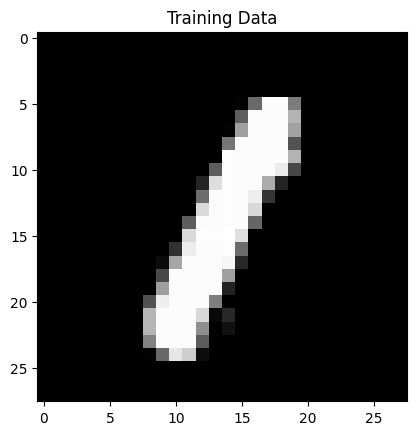

In [15]:
'''Predicting random number from the training set'''

index = np.random.randint(0, X_train.shape[1])
image = X_train[:, index, None]
label = y_train[index]

_, _, _, A2 = forward_prop(weight_layer_1, bias_layer_1, weight_layer_2, bias_layer_2, image)
prediction = predict(A2)
confidence = pd.Series(A2.flatten())

levels = {
    0.9: "High",
    0.7: "Moderate",
    0.5: "Low",
    0.0: "Not Significant",
}
conf_level = [levels[threshold] for threshold in levels.keys() if confidence.max() >= threshold]

print("Eample No:        ", f"{index}/{y_train.size}")
print("Known Label:      ", label)
print("Model Prediction: ", prediction.item())
print("Prediction:       ", prediction.item()==label)
print(f"Confidence:        {conf_level[0]}: {confidence.max():.2%}")
print(f"\nNetwork Reasoning\n{round(confidence*100,2).sort_values(ascending=False).to_string()}")
plt.title("Training Data")
plt.imshow(image.reshape((28, 28)) * 255, interpolation='nearest')
plt.gray()
plt.show()

Eample No:         978/1000
Known Label:       9
Model Prediction:  9
Prediction:        True
Confidence:        Moderate: 87.58%

Network Reasoning
9    87.58
7    10.95
4     0.87
3     0.38
5     0.13
8     0.08
1     0.00
0     0.00
2     0.00
6     0.00


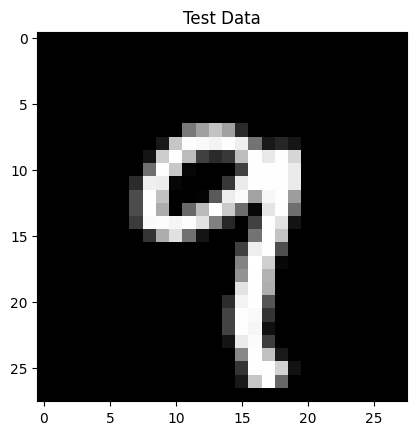

In [16]:
'''Predicting random number from the test set'''

index = np.random.randint(0, X_test.shape[1])
image = X_test[:, index, None]
label = y_test[index]

_, _, _, A2 = forward_prop(weight_layer_1, bias_layer_1, weight_layer_2, bias_layer_2, image)
prediction = predict(A2)
confidence = pd.Series(A2.flatten())

levels = {
    0.9: "High",
    0.7: "Moderate",
    0.5: "Low",
    0.0: "Not Significant",
}
conf_level = [levels[threshold] for threshold in levels.keys() if confidence.max() >= threshold]

print("Eample No:        ", f"{index}/{y_test.size}")
print("Known Label:      ", label)
print("Model Prediction: ", prediction.item())
print("Prediction:       ", prediction.item()==label)
print(f"Confidence:        {conf_level[0]}: {confidence.max():.2%}")
print(f"\nNetwork Reasoning\n{round(confidence*100,2).sort_values(ascending=False).to_string()}")
plt.title("Test Data")
plt.imshow(image.reshape((28, 28)) * 255, interpolation='nearest')
plt.gray()
plt.show()